# Variational Quantum Linear Solver for Newton-Raphson 
As explained in the previous notebook, the Newton Raphson approach relies on the solution of a linear system. Several quantum linear solvers have been developped, one of them being the Variational Quantum linear solver. This solver uses a variational approach to solve the system of linear equations.

## Example 
To make things clearer let's consider the following example:

$$
f_1(x,y,z) = 2x^3 - x y+ 4z -12 \\
f_2(x,y,z) = -4x + z^5 + 8 z y \\
f_3(x,y,z) = 3x^3 +z^5 + 8 z y
$$

That we define in the following function

In [1]:
import numpy as np
def func(input):
    def f1(x,y):
        return 0.1*(2*x**3 - 4* y)
    def f2(x,y):
        return 0.1*(- 4 * x + 8*y**2)
    x, y = input
    return np.array([f(x,y) for f in[f1,f2]])

# Using VQSL to solve the linear system

The `QuantumNewtonRaphson` can use our `vqls` solver to solve the linear system of equations at the hart of the newton raphson routine.  

In [2]:
import numpy as np
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import RealAmplitudes
from qiskit.primitives import Estimator
from quantum_newton_raphson.newton_raphson import newton_raphson
from quantum_newton_raphson.vqls_solve import VQLS_SOLVER

estimator = Estimator()
ansatz = RealAmplitudes(1, entanglement='full', reps=3)
optim = COBYLA()

# define the linear solver with the reorder solver
solver = VQLS_SOLVER(estimator=estimator, ansatz=ansatz, optimizer=optim, matrix_decomposition="symmetric")

# Solve the newton raphson problem
res = newton_raphson(func, np.random.rand(2), linear_solver=solver, verbose=True, max_iter=10)


/tmp/ipykernel_92122/3899750182.py:2: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import COBYLA


0/10 error = 0.4056584640869696(1e-10)
[[ 0.25268311 -0.4       ]
 [-0.4         1.45902895]] [-0.31009751  0.40565846]


/home/nico/QuantumApplicationLab/QuantumNewtonRaphson/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


[[ 0.25268311+0.j -0.4       +0.j]
 [-0.4       +0.j  1.45902895+0.j]]
1/10 error = 1.2916038666350247(1e-10)
[[ 2.49672311 -0.4       ]
 [-0.4         1.62434925]] [1.29160387 0.00857324]
[[ 2.49672311+0.j -0.4       +0.j]
 [-0.4       +0.j  1.62434925+0.j]]
2/10 error = 0.31126079039566196(1e-10)
[[ 1.38567191 -0.4       ]
 [-0.4         1.56267643]] [0.31126079 0.15523635]
[[ 1.38567191+0.j -0.4       +0.j]
 [-0.4       +0.j  1.56267643+0.j]]
3/10 error = 0.22686214639028465(1e-10)
[[ 0.96567097 -0.4       ]
 [-0.4         1.53291232]] [0.02513539 0.22686215]
[[ 0.96567097+0.j -0.4       +0.j]
 [-0.4       +0.j  1.53291232+0.j]]
4/10 error = 0.2873540402609968(1e-10)
[[ 1.35334974 -0.4       ]
 [-0.4         1.56063928]] [0.28735404 0.1603795 ]
[[ 1.35334974+0.j -0.4       +0.j]
 [-0.4       +0.j  1.56063928+0.j]]
5/10 error = 0.22969506018076596(1e-10)
[[ 0.95071197 -0.4       ]
 [-0.4         1.53175029]] [0.01597393 0.22969506]
[[ 0.95071197+0.j -0.4       +0.j]
 [-0.4       +0.j

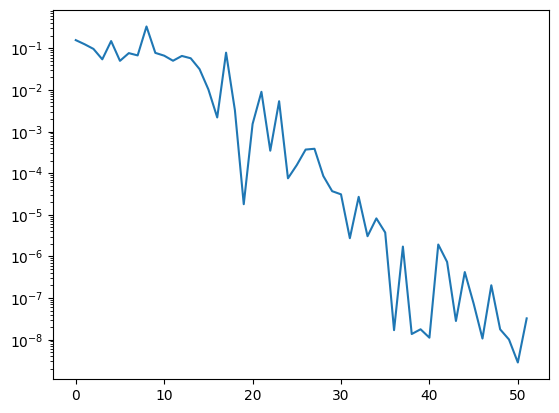

In [3]:
import matplotlib.pyplot as plt
# plt.semilogy([l.residue for l in res.linear_solver_results])
plt.semilogy(res.linear_solver_results[2].logger.values)


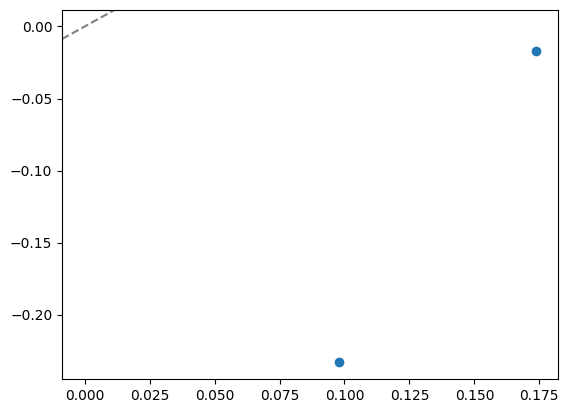

In [4]:
n = 3
plt.scatter(res.linear_solver_results[n].ref, res.linear_solver_results[n].solution)
_ = plt.axline( (0,0), slope=1,linestyle='--',color='grey')

We can check the solution against the solution obatined via a classical newton raphson 

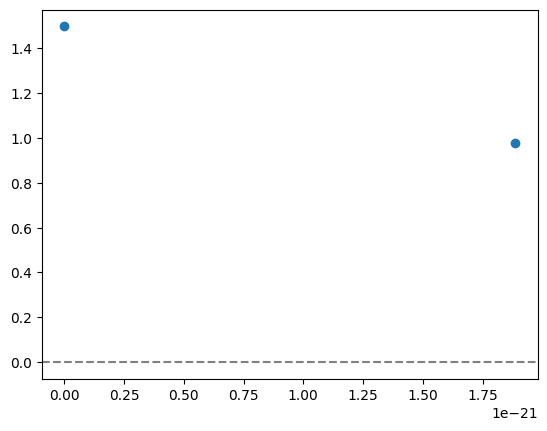

In [5]:
import matplotlib.pyplot as plt
res_ref = newton_raphson(func, np.random.rand(2))
plt.scatter(res_ref.solution,res.solution)
_ = plt.axline( (0,0),slope=1,linestyle='--',color='grey')